In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
with open("data/Tree1_v3.json", "r") as f_real:
    real_data = [json.loads(line) for line in f_real]
for entry in real_data:
    entry["source"] = "real"

with open("data/Tree1_sim/simulated_v3_model1.json", "r") as f_sim:
    model1_data = [json.loads(line) for line in f_sim]
for entry in model1_data:
    entry["source"] = "model1"

df = real_data + model1_data
df = pd.DataFrame(df)
df

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,timeout
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,real,NaN
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,real,NaN
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,real,NaN
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,real,NaN
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,real,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,w2424d8d,"[5, -1, -7]","[1, -3]","[4, -2, -4]",1,1,1729.0,793.0,2522,9.0,9,-1.0,model1,False
9492,w2424d8d,"[6, -2, -4]","[2, 0]","[4, -4, -4]",1,1,1924.0,793.0,2717,9.0,9,-1.0,model1,False
9493,w2424d8d,"[-6, -2, 2]","[-2, 4]","[-4, 0, -2]",2,2,1599.0,794.0,2393,6.0,6,2.0,model1,False
9494,w2424d8d,"[0, -8, 1]","[-4, 3]","[4, -4, -2]",2,3,1764.0,794.0,2558,5.0,5,2.0,model1,False


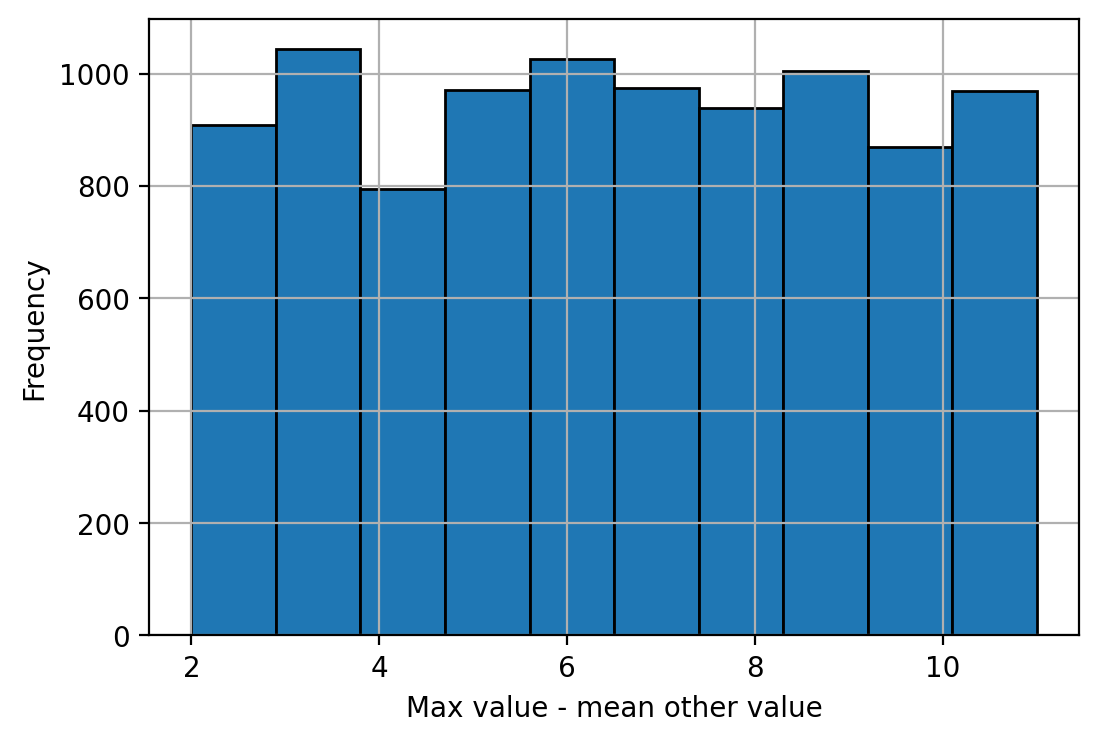

In [3]:
plt.figure(figsize=(6, 4))
plt.hist(df['difficulty'], edgecolor='black', density=False)
plt.xlabel("Max value - mean other value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [4]:
# first stage accuracy
df['best_path_idx'] = df['rewards'].apply(lambda v: int(np.argmax(v)))
df['correct1'] = df.apply(
    lambda r: (r['best_path_idx'] < 2 and r['choice1'] == 1)
              or (r['best_path_idx'] >= 2 and r['choice1'] == 2),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,timeout,best_path_idx,correct1
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,real,NaN,1,False
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,real,NaN,2,True
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,real,NaN,2,True
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,real,NaN,2,True
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,real,NaN,0,True


In [6]:
def subtree_vals(path_value, choice1):

    if choice1 == 1:
        return path_value[0:2]
    else:
        return [path_value[2]]

df['correct2'] = df.apply(
    lambda r: (
        r['value2'][r['choice2'] - 1]
        == max(subtree_vals(r['value2'], r['choice1']))
    ),
    axis=1
)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,timeout,best_path_idx,correct1,correct2
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,real,NaN,1,False,True
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,real,NaN,2,True,True
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,real,NaN,2,True,True
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,real,NaN,2,True,True
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,real,NaN,0,True,True


In [7]:
# 6. Overall correctness
df['correct_all'] = df['correct1'] & df['correct2']
df.tail()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,timeout,best_path_idx,correct1,correct2,correct_all
9491,w2424d8d,"[5, -1, -7]","[1, -3]","[4, -2, -4]",1,1,1729.0,793.0,2522,9.0,9,-1.0,model1,False,0,True,True,True
9492,w2424d8d,"[6, -2, -4]","[2, 0]","[4, -4, -4]",1,1,1924.0,793.0,2717,9.0,9,-1.0,model1,False,0,True,True,True
9493,w2424d8d,"[-6, -2, 2]","[-2, 4]","[-4, 0, -2]",2,2,1599.0,794.0,2393,6.0,6,2.0,model1,False,2,True,False,False
9494,w2424d8d,"[0, -8, 1]","[-4, 3]","[4, -4, -2]",2,3,1764.0,794.0,2558,5.0,5,2.0,model1,False,2,True,True,True
9495,w2424d8d,"[8, 0, 2]","[4, 2]","[4, -4, 0]",1,1,3128.0,793.0,3921,7.0,7,-1.0,model1,False,0,True,True,True


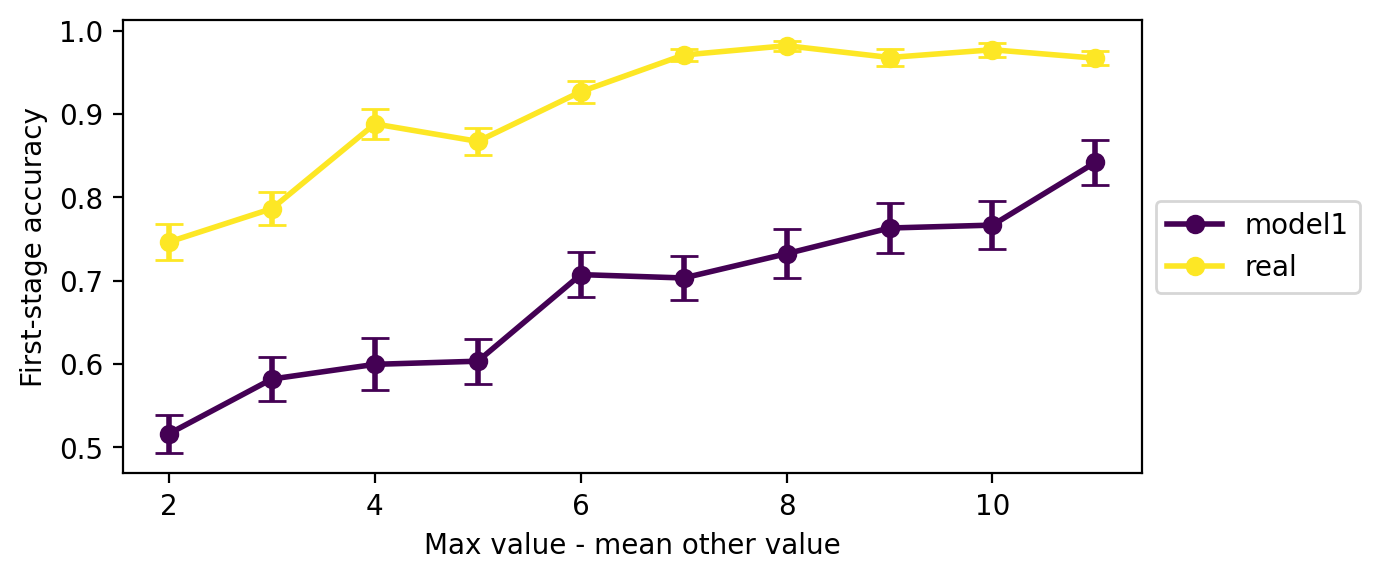

In [8]:
per1 = (
    df.groupby(['source','wid','diff1'])['correct1']
      .mean()
      .reset_index(name='accuracy1')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. 画图
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

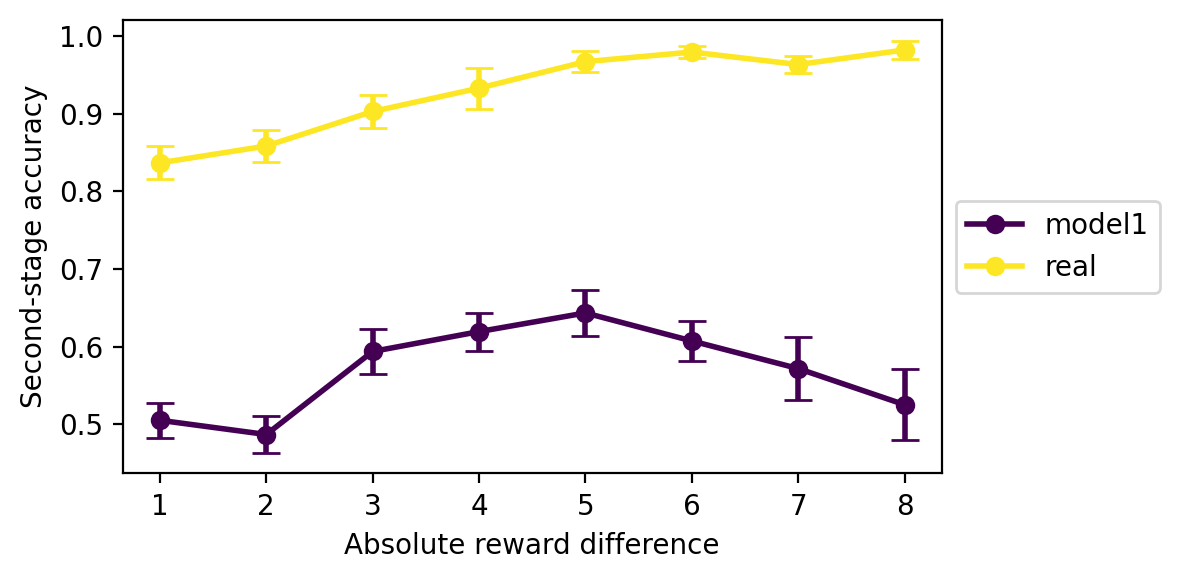

In [9]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# b) Second‐stage accuracy by diff2
per2 = (
    subdf.groupby(['source','wid','diff2'])['correct2']
      .mean()
      .reset_index(name='accuracy2')
)

# 2. Compute group‐level mean and SEM
stats = (
    per2.groupby(['source','diff2'])['accuracy2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. colormap setup
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot each subject in gray
for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5, label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage accuracy')

legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o', label=str(source),
           linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

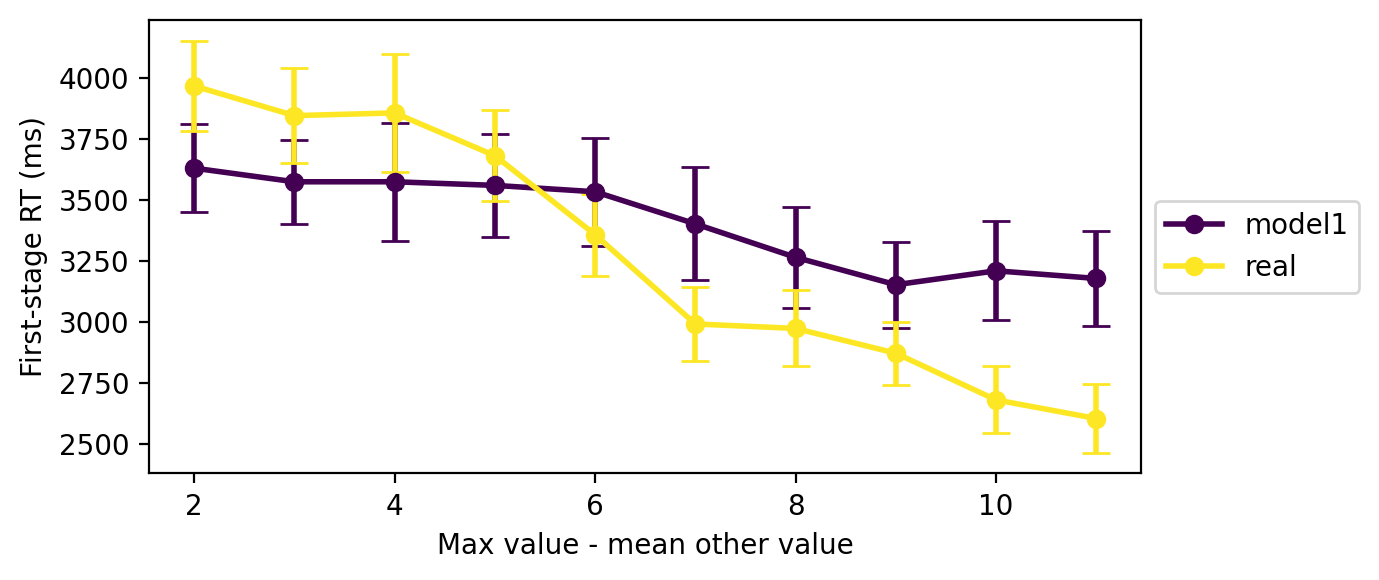

In [41]:
# c) First‐stage RT (mean) for correct trials by diff1
rt1 = (
    df[df['correct1']]
      .groupby(['source','wid','diff1'])['rt1']
      .mean()
      .reset_index(name='mean_rt1')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt1.groupby(['source','diff1'])['mean_rt1']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Setup colormap (modern API, no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('First-stage RT (ms)')

# 5. Custom legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

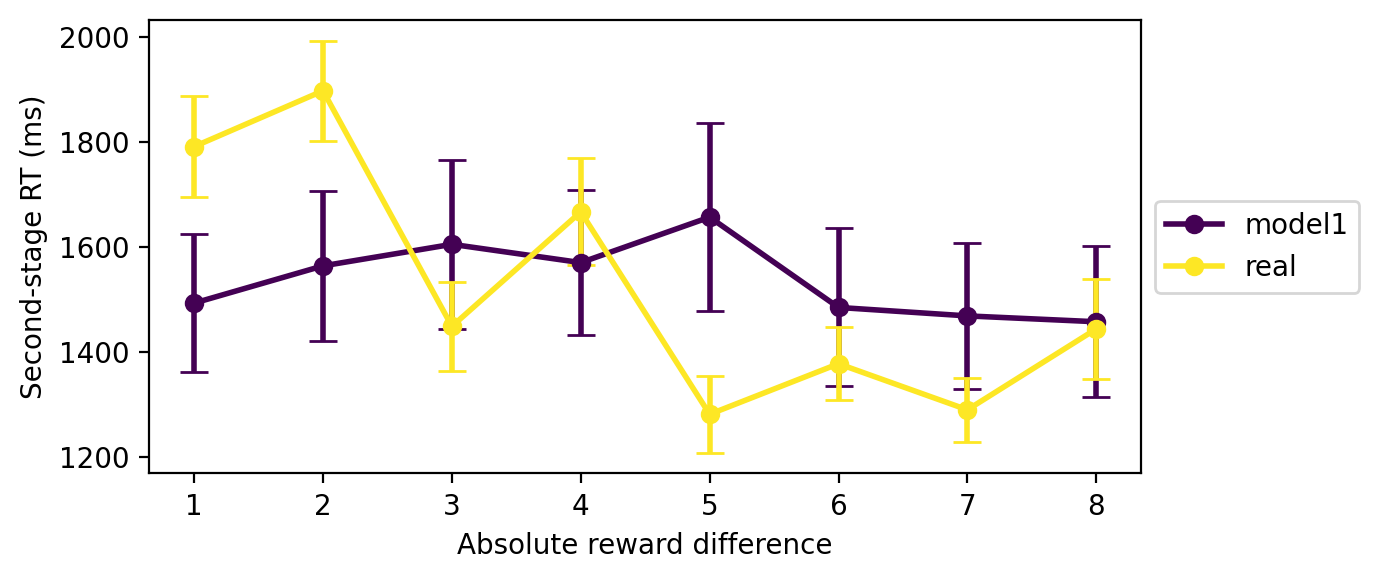

In [42]:
subdf = df.copy()
subdf = subdf[subdf['diff2'] != -1]
subdf = subdf[subdf['diff2'] != 0]

# d) Second‐stage RT (mean) for correct trials by diff2
rt2 = (
    subdf[subdf['correct2']]
      .groupby(['source','wid','diff2'])['rt2']
      .mean()
      .reset_index(name='mean_rt2')
)

# 2. Compute group‐level mean and SEM
stats = (
    rt2.groupby(['source','diff2'])['mean_rt2']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap setup (no warning)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff2'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Absolute reward difference')
ax.set_ylabel('Second-stage RT (ms)')

# Optional: ax.set_ylim(0, 4000)

# 5. Custom color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

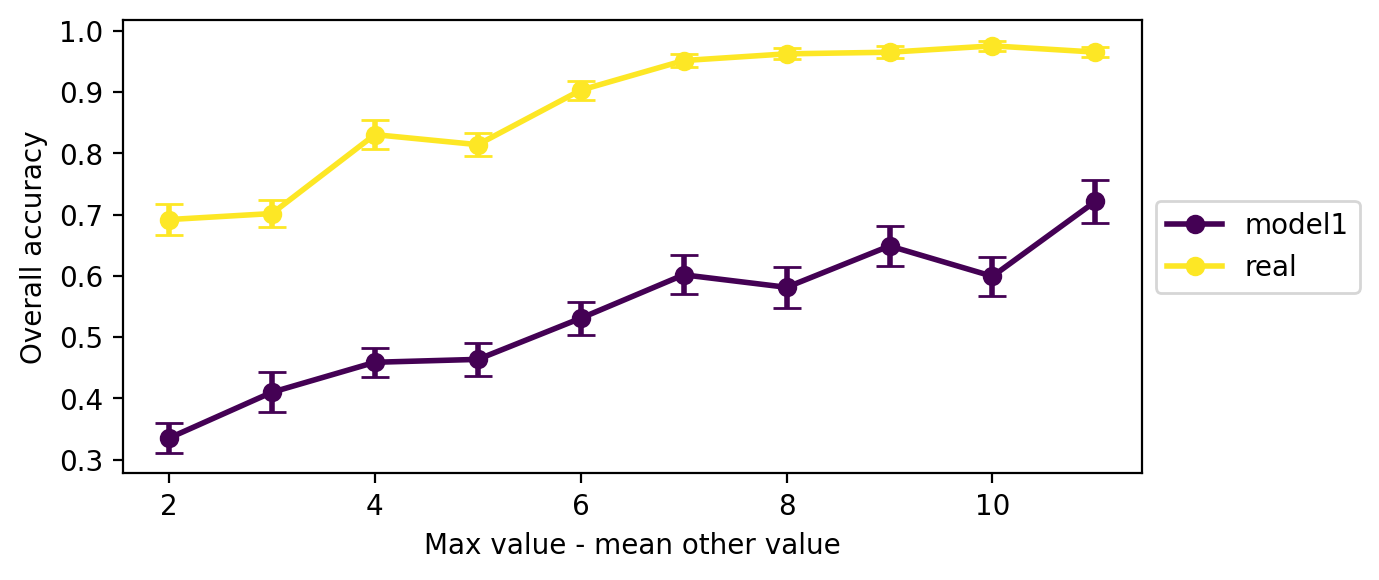

In [43]:
subdf = df.copy()
subdf = subdf[subdf['diff1'] != -1]

per1 = (
    subdf.groupby(['source','wid','diff1'])['correct_all']
      .mean()
      .reset_index(name='accuracy')
)

# 2. Compute group‐level mean and SEM
stats = (
    per1.groupby(['source','diff1'])['accuracy']
        .agg(['mean','std','count'])
        .reset_index()
)
stats['sem'] = stats['std'] / np.sqrt(stats['count'])

# 3. Colormap (modern API, gradient coloring)
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 4. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['diff1'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

ax.set_xlabel('Max value - mean other value')
ax.set_ylabel('Overall accuracy')

# Optional: ax.set_ylim(0, 1)

# 5. Color-mapped legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

In [44]:
def subtree_relation_code(rewards, single_right_idx=2):
    """
    Three‐path tree configuration:
      - Right subtree  = {single_right_idx} (default = 2)
      - Left subtree   = the other two indices
    Returns:
      1 if the best path is the single right‐subtree path
      2 if both best & second‐best are in the left subtree
      3 if both best & worst      are in the left subtree
    """
    # sort indices by reward descending → [best, second, worst]
    best, second, worst = np.argsort(rewards)[::-1]

    # predicate: is this index the single right‐subtree path?
    is_right = lambda i: (i == single_right_idx)

    if is_right(best):
        return 1
    elif (not is_right(best)) and (not is_right(second)):
        return 2
    elif (not is_right(best)) and (not is_right(worst)):
        return 3
    else:
        return np.nan

# Add to your DataFrame
df['subtree_relation'] = df['rewards'].apply(subtree_relation_code)

df.head()

,wid,rewards,value1,value2,choice1,choice2,rt1,rt2,rt,difficulty,diff1,diff2,source,timeout,best_path_idx,correct1,correct2,correct_all,subtree_relation
0,wdf61453,"[-7, -2, -3]","[-4, -3]","[-3, 2, 0]",2,3,5060.0,1976.0,7036,3.0,3,-1.0,real,NaN,1,False,True,False,3
1,wdf61453,"[-8, -2, 5]","[-4, 4]","[-4, 2, 1]",2,3,2127.0,5453.0,7580,10.0,10,-1.0,real,NaN,2,True,True,True,1
2,wdf61453,"[-5, -3, 5]","[-4, 2]","[-1, 1, 3]",2,3,2495.0,1769.0,4264,9.0,9,-1.0,real,NaN,2,True,True,True,1
3,wdf61453,"[-6, 0, 7]","[-2, 3]","[-4, 2, 4]",2,3,2266.0,1665.0,3931,10.0,10,-1.0,real,NaN,2,True,True,True,1
4,wdf61453,"[2, -2, -6]","[1, -4]","[1, -3, -2]",1,1,3041.0,2981.0,6022,6.0,6,4.0,real,NaN,0,True,True,True,2


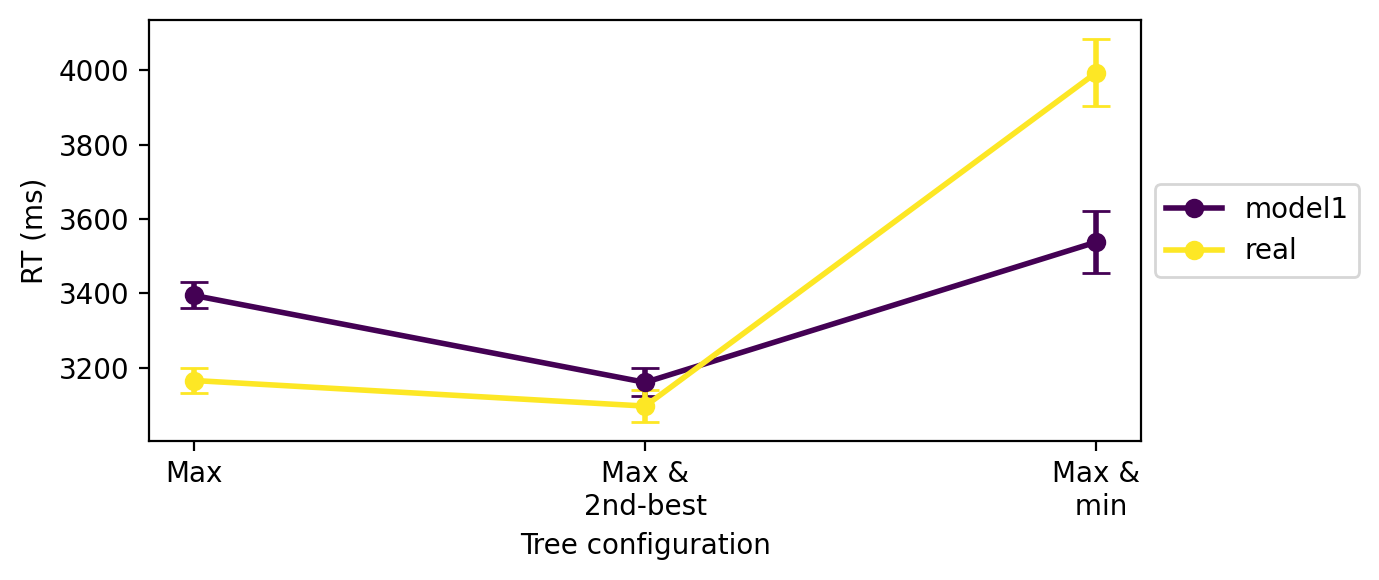

In [47]:
# 1. Compute mean and SEM of RT1 per source × subtree_relation
stats = df.groupby(['source', 'subtree_relation'])['rt1'].agg(['mean', 'sem']).reset_index()

# 2. Setup colormap
unique_sources = sorted(stats['source'].unique())
n_sources = len(unique_sources)
cmap = plt.colormaps.get_cmap('viridis').resampled(n_sources)
norm = mcolors.Normalize(vmin=0, vmax=n_sources - 1)

# 3. Plot
fig, ax = plt.subplots(figsize=(7, 3))

for idx, (source, grp) in enumerate(stats.groupby('source')):
    color = cmap(norm(idx))
    ax.errorbar(grp['subtree_relation'], grp['mean'], yerr=grp['sem'],
                marker='o', linewidth=2, capsize=5,
                label=str(source), color=color)

# 4. Label formatting
ax.set_xlabel('Tree configuration')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Max', 'Max &\n2nd-best', 'Max &\n min'])
ax.set_ylabel('RT (ms)')

# 5. Custom color-coded legend
legend_elements = [
    Line2D([0], [0], color=cmap(norm(i)), marker='o',
           label=str(source), linestyle='-', linewidth=2)
    for i, source in enumerate(unique_sources)
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
